In [229]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

## Read the dataset

In [230]:
#Reading the csv file
df = pd.read_csv("insurance.csv")

## Getting to know the data!

In [231]:
#We want to know what type of data is df variable
type(df)

#Answer: This is an DataFrame object for the variable df

pandas.core.frame.DataFrame

In [232]:
#Lets investigate the number of rows the data contains
len(df)

#Answer: The data contains 1338 rows.

1338

In [233]:
#We can also investigate the number of rows and cloumns (dimensionality)
df.shape

#Answer: The data contains 1338 rows and 7 columns.

(1338, 7)

In [234]:
#We can also examine to see if we chose the correct csv file by checking first 5 rows
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Data Types and Data Scales

In [235]:
#Here, we will display the data types for this dataset
df.info()

#Answer: 1) It shows number of rows (1338) for all 7 columns
#        2) There are no null values or missing values for this dataset
#        3) Data Type for each of the data columns (int,object (string),float)
#                Data Types              Data Scale
#age             numerical [int]         Ratio
#sex             categorical [string]    Nominal
#bmi             numerical [float]       Ratio
#children        numerical [int]         Ratio
#smoker          categorical [string]    Nominal
#region          categorical [string]    Nominal
#charges         numerical [float]       Ratio

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


| Attribute  | Data Type            | Data Scale |
|------------|------------          |------------|
|age         | numerical int        |  ratio     |
|sex         | categorical          |  nominal   |
|bmi         | numerical float      |  ratio     |
|children    | numerical int        |  ratio     |
|smoker      | categorical          |  nominal   |
|region      | categorical          |  nominal   |
|charges     | numerical float      |  ratio     |

### Description of the attributes

Age: The age of the person.

Sex: The gender (male or female) of the person.

BMI: Body Mass Index, is a measure of body size. It uses person’s weight and height to calculate the BMI. The result we get tells us whether the person is underweight if result is < 18.5, healthy weight if result is 18.5 – 24.9, overweight if result is 25.0 – 29.9, or obesity if result is 30 or higher. 

Children: Number of dependents that this person has.

Smoker: If person smokes then yes or does not smoke then no.

Region: This is residential area where the person resides. For example: Northwest/Southeast/Southwest, etc.

Charges: This is the medical costs that is billed by the insurance providers.

## Overview of the basic statistics of the dataset

### Information for all numeric columns only

In [236]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Information for categorical data types

In [237]:
df.describe(include=np.object)

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


### Exploring how often values occur

In [238]:
#Getting to know count of age
#plt.hist(df['age'])
df['age'].value_counts().head()

18    69
19    68
51    29
45    29
46    29
Name: age, dtype: int64

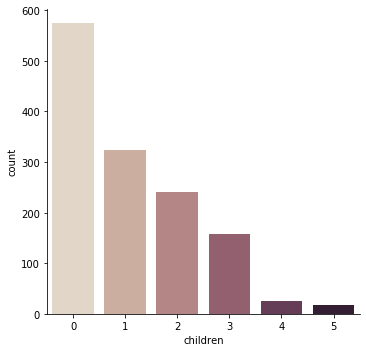

In [239]:
#Getting to know count of children
#We can analyze that fewer households seems to have fewer childrens.
df['children'].value_counts()
sns.catplot(x="children", kind="count", palette="ch:.25", data=df);

In [240]:
#Getting to know count of gender
#Male and Female counts seems to be balanced.
df['sex'].value_counts()
#sns.catplot(x="sex", kind="count", palette="ch:.25", data=df);

male      676
female    662
Name: sex, dtype: int64

In [241]:
#Getting to know count of smoker
#We analyze that there are fewer smokers than people of actually smokes.
df['smoker'].value_counts()
#sns.catplot(x="smoker", kind="count", palette="ch:.25", data=df);

no     1064
yes     274
Name: smoker, dtype: int64

In [242]:
#Getting to know count of region
#From what we know from below is that the number of people across the regions are balanced.
df['region'].value_counts()
#sns.catplot(x="region", kind="count", palette="ch:.25", data=df);

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

## Identify the missing values (Does NOT apply to this dataset)

In [243]:
#Identifying if there are any missing values in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


Answer: There are "no missing values" associated with this dataset.
The reason is that all attributes contains 1338 entries that are non-null.

In [244]:
# Number of unique values
num_unique_values = df.apply(lambda x : len(x.unique()), axis=0)
num_unique_values

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

Answer: This will check the unique values for each attributes in the dataset.

In [245]:
# Number of missing values
num_missing_values = df.apply(lambda x : x.isnull().sum(), axis=0)
num_missing_values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Answer: There are "no missing values" associated with this dataset.
We checked by using the apply function and see is there is any null values.

## Identify the outliers (by IQR Score)
We will identify and handle the outliers by using the IQR Score method. We identify the outliers for each attributes.

In [246]:
df_copy = df[['age','sex','bmi', 'children','smoker','region','charges']].copy()
Q1 = df_copy.quantile(0.25)
Q3 = df_copy.quantile(0.75)
IQR = Q3 - Q1

In [247]:
print((df_copy < (Q1-1.5*IQR))|(df_copy > (Q3+1.5*IQR)))

#Answer: If there exist True value, then this means that there is outlier in that instance. 

        age    bmi  charges  children  region    sex  smoker
0     False  False    False     False   False  False   False
1     False  False    False     False   False  False   False
2     False  False    False     False   False  False   False
3     False  False    False     False   False  False   False
4     False  False    False     False   False  False   False
5     False  False    False     False   False  False   False
6     False  False    False     False   False  False   False
7     False  False    False     False   False  False   False
8     False  False    False     False   False  False   False
9     False  False    False     False   False  False   False
10    False  False    False     False   False  False   False
11    False  False    False     False   False  False   False
12    False  False    False     False   False  False   False
13    False  False    False     False   False  False   False
14    False  False     True     False   False  False   False
15    False  False    Fa

In [248]:
df_copy2 = df_copy[~((df_copy < (Q1-1.5*IQR))|(df_copy > (Q3+1.5*IQR))).any(axis=1)]
df_copy2.shape

(1193, 7)

Answer: 1193 is the number of remianing clean data and the 145 is the data that is outliers and we deleted it.

In [249]:
#We can see the clean data by priting as shown below. This becomes our new updated cleaned DataFrame.
df_copy2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Label Encoding to categorical values

In [250]:
le = LabelEncoder()

#female = 0, male = 1
df_copy2['sex']=le.fit_transform(df_copy2["sex"])
#yes = 1, no = 0
df_copy2['smoker']=le.fit_transform(df_copy2["smoker"])
# Regions 0=NorthEast, 1=NorthWest, 2=SouthEast, 3=SouthWest
df_copy2['region']=le.fit_transform(df_copy2["region"])

### sex, smoker, region have been encoded to numerical values

In [251]:
df_copy2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


## Normalize the Dataset by Z-Score Normalization - ***Note: We do NOT need to normalize our dataset because its within the scale. However, I tested analysis with normalized and un-normalized and features did not over take any other features since we are within the smiliar scale.

In [252]:
zs_scaler = preprocessing.StandardScaler()
zs_scaled = zs_scaler.fit_transform(df_copy2)

#Original data
print(df_copy2.head())
df_scaled = pd.DataFrame(data=zs_scaled, columns=df_copy2.columns)

#Normalized data
df_scaled.head()

   age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520


,age,sex,bmi,children,smoker,region,charges
0,-1.421407,-0.975980,-0.357841,-0.892872,2.764946,1.356873,0.957834
1,-1.492543,1.024611,0.643111,-0.070327,-0.361671,0.456066,-1.133608
2,-0.781184,1.024611,0.511811,1.574764,-0.361671,0.456066,-0.757808
3,-0.425504,1.024611,-1.243693,-0.892872,-0.361671,-0.444740,1.661386
4,-0.496640,1.024611,-0.190732,-0.892872,-0.361671,-0.444740,-0.838186


# Applying Transformations

## Converting categorical data to numerical data for normalizing


In [253]:
le = LabelEncoder()

#female = 0, male = 1
df_scaled['sex']=le.fit_transform(df_scaled["sex"])
#yes = 1, no = 0
df_scaled['smoker']=le.fit_transform(df_scaled["smoker"])
# Regions 0=NorthEast, 1=NorthWest, 2=SouthEast, 3=SouthWest
df_scaled['region']=le.fit_transform(df_scaled["region"])

## Equal-width Binning for Age

In [254]:
count, division=np.histogram(df_copy2['age'], bins=5)
#Border for bins
print(division)

#Counts the number of person inside the bin
print(count)

[18.  27.2 36.4 45.6 54.8 64. ]
[330 213 209 229 212]


## Correlation Matrix

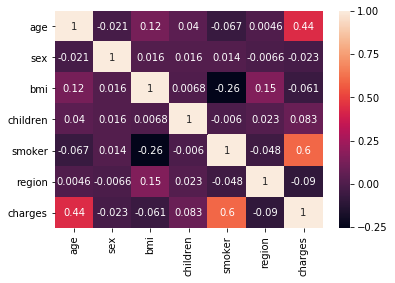

In [255]:
corr = df_scaled.corr()
sns.heatmap(corr, annot=True)
plt.show()

#### We see high correlation in age and smoker vs charges. We still need to further analyze other features.

# Impurity-Based Univariate Feature Selection

In [256]:
# entropy (H)

def entropy(feature, dataset):
    """Calculates the entropy of a feature in a given dataset.
    
    Parameters
    ----------
    feature: str
        name of the feature
    dataset: pd.DataFrame
        dataframe for the dataset
    Returns
    -------
    float
        entropy for the feature in the dataset
    """
    ##your implementation goes here
    #keys = list(dataset.groupby([feature])[feature].count().index)
    #count unique values
    values = list(dataset.groupby([feature])[feature].count().values)
    #print(values)
    ent = 0
    total = sum(values)
    #calculating entrophy
    for c in values:
      pi = c/total
      ent += -pi*np.log2(pi)
    return ent

print('Entropy for all descriptive features: ')
print(entropy('age', df_scaled))
print(entropy('sex', df_scaled))
print(entropy('bmi', df_scaled))
print(entropy('children', df_scaled))
print(entropy('smoker', df_scaled))
print(entropy('region', df_scaled))

Entropy for all descriptive features: 
5.496840345974974
0.9995737126643269
8.704162718648488
2.0153865796090846
0.5167989821565566
1.999751001196213


In [257]:
# gini index (Gini)

def gini(feature, dataset):
    """Calculates the gini index of a feature in a given dataset.
    
    Parameters
    ----------
    feature: str
        name of the feature
    dataset: pd.DataFrame
        dataframe for the dataset
    Returns
    -------
    float
        gini index for the feature in the dataset
    """
    ##your implementation goes here
    values = list(dataset.groupby([feature])[feature].count().values)
    gini_index = 0
    total = sum(values)
    for c in values:
      pi = c/total
      gini_index += pi**2
    return 1-gini_index

print('Gini index for all descriptive features: ')
print(gini('age', df_scaled))
print(gini('sex', df_scaled))
print(gini('bmi', df_scaled))
print(gini('children', df_scaled))
print(gini('smoker', df_scaled))
print(gini('region', df_scaled))

Gini index for all descriptive features: 
0.9764545768168466
0.4997045492391001
0.9971171594007795
0.7078213299289162
0.20458823438484752
0.7499137536720559


In [258]:
# information gain (IG)

def IG(feature, target, dataset, measure):
    """Calculates the information gain of a feature for a given target variable and a dataset.
    
    Parameters
    ----------
    feature: str
        name of the feature
    target: str
        name of the target variable
    dataset: pd.DataFrame
        dataframe for the dataset
    measure: str ('entropy' or 'gini')
        measure of impurity to be used
    Returns
    -------
    float
        information gain for the feature in the dataset for a given target variable
    """
    ##your implementation goes here
    feature_keys = list(dataset.groupby([feature])[feature].count().index)
    feature_values = list(dataset.groupby([feature])[feature].count().values)
    total = sum(feature_values)
    if measure == 'entropy':
      entropy_target = entropy(target, dataset) 
      ent_all = 0
      for i in range(len(feature_keys)):
        df = dataset[dataset[feature]==feature_keys[i]]
        pi = feature_values[i]/total
        ent = entropy(target, df)
        ent_all += pi*ent
      return entropy_target-ent_all
    elif measure == 'gini':
      gini_target = gini(target, dataset) 
      gini_all = 0
      for i in range(len(feature_keys)):
        df = dataset[dataset[feature]==feature_keys[i]]
        pi = feature_values[i]/total
        g = gini(target, df)
        gini_all += pi*g
      return gini_target-gini_all

print("Age - Information Gain:")
print(IG('age','charges', df_scaled, 'gini'))

print("\nSex - Information Gain:")
print(IG('sex','charges', df_scaled, 'gini'))

print("\nBMI - Information Gain:")
print(IG('bmi','charges', df_scaled, 'gini'))

print("\nChildren - Information Gain:")
print(IG('children','charges', df_scaled, 'gini'))

print("\nSmoker - Information Gain:")
print(IG('smoker','charges', df_scaled, 'gini'))

print("\nRegion - Information Gain:")
print(IG('region','charges', df_scaled, 'gini'))

Age - Information Gain:
0.03858389071130042

Sex - Information Gain:
0.0008396982231200223

BMI - Information Gain:
0.4285700233359443

Children - Information Gain:
0.004192933535550392

Smoker - Information Gain:
0.0008384067801027184

Region - Information Gain:
0.002518760210489912


In [259]:
def IUFS(target, dataset, k, measure='entropy'):
    """Finds k most informative features in the given dataset based on the target variable
        using information gain with the selected measure.
        
    Parameters
    ----------
    target: str
        name of the target variable
    dataset: pd.DataFrame
        dataframe for the dataset
    k: int
        number of features to return, must be less than or equal to number of descriptive features in dataset.
        in other words, 0 < k < len(dataset.columns).
    measure: str, 'entropy' or 'gini'
        measure of impurity
    Returns
    -------
    list
        returns a list of k feature names, selected based on univariate selection schema
    """
    ##your implementation goes here
    if 0 < k < len(dataset.columns):
      ig = []
      features = []
      for col in dataset.columns:
        if col != target:
          gain = IG(col, target, dataset, measure)
          ig.append(gain)
          features.append(col)
      idx = sorted(range(len(ig)), reverse=True, key=lambda k: ig[k])
      features_sorted = [features[i] for i in idx]
      return features_sorted[0:k]

#print("4 Most informative features using information gain with the Entropy:")
#print(IUFS('charges', df_scaled, 4, measure='entropy'))

## 4 Most Informative Features Using Information Gain With The Entropy:

In [260]:
print(IUFS('charges', df_scaled, 4, measure='entropy'))

['bmi', 'age', 'children', 'region']


# Data Quality Report - (Continuous Features)

In [261]:
df_con = df[['age','bmi','children','charges']]
conTable = pd.DataFrame(columns=['Features','Count','%Miss','Card.','Min.','1stQartile','Mean','Median','3rdQartile',
                                 'Max.','StdDev'])
conTable['Features'] = list(df_con.columns.values)
conTable['Count'] = list(df_con.count(axis=0))
conTable['%Miss'] = list(df_con.isnull().sum()/len(df)*100)
conTable['Card.'] = list(df_con.apply(pd.Series.nunique))
conTable['Min.'] = list(df_con.min(axis=0))
conTable['1stQartile'] = list(df_con.quantile(q=0.25,axis=0))
conTable['Mean'] = list(df_con.mean(axis=0))
conTable['Median'] = list(df_con.median(axis=0))
conTable['3rdQartile'] = list(df_con.quantile(q=0.75,axis=0))
conTable['Max.'] = list(df_con.max(axis=0))
conTable['StdDev'] = list(df_con.std(axis=0))
conTable

,Features,Count,%Miss,Card.,Min.,1stQartile,Mean,Median,3rdQartile,Max.,StdDev
0,age,1338,0.0,47,18.0000,27.00000,39.207025,39.000,51.000000,64.00000,14.049960
1,bmi,1338,0.0,548,15.9600,26.29625,30.663397,30.400,34.693750,53.13000,6.098187
2,children,1338,0.0,6,0.0000,0.00000,1.094918,1.000,2.000000,5.00000,1.205493
3,charges,1338,0.0,1337,1121.8739,4740.28715,13270.422265,9382.033,16639.912515,63770.42801,12110.011237


### Histogram for each continuous features - before/after data clean up

#### Histogram for age

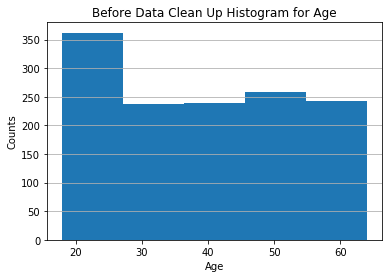

In [262]:
#Before data clean up
plt.hist(df['age'], bins=5)
plt.title("Before Data Clean Up Histogram for Age")
plt.xlabel("Age")
plt.ylabel("Counts")
plt.grid(axis='y')
plt.show()

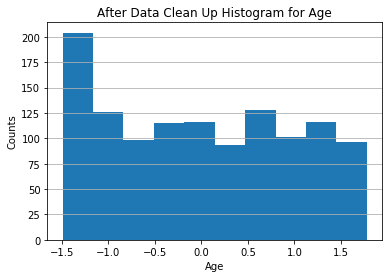

In [263]:
#After data clean up
plt.hist(df_scaled['age'])
plt.title("After Data Clean Up Histogram for Age")
plt.xlabel("Age")
plt.ylabel("Counts")
plt.grid(axis='y')
plt.show()

#### Histogram for bmi

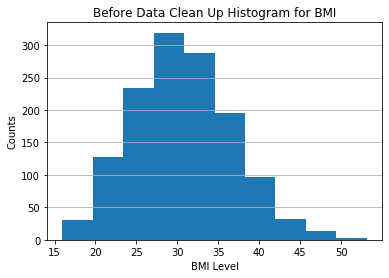

In [264]:
#Before data clean up
plt.hist(df['bmi'])
plt.title("Before Data Clean Up Histogram for BMI")
plt.xlabel("BMI Level")
plt.ylabel("Counts")
plt.grid(axis='y')
plt.show()

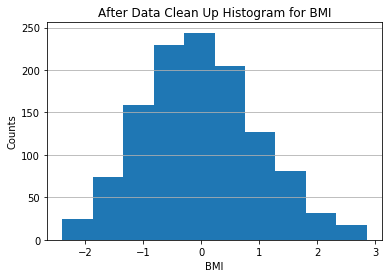

In [265]:
#After data clean up
plt.hist(df_scaled['bmi'])
plt.title("After Data Clean Up Histogram for BMI")
plt.xlabel("BMI")
plt.ylabel("Counts")
plt.grid(axis='y')
plt.show()

#### Histogram for children

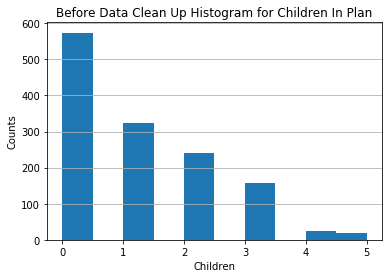

In [266]:
#Before data clean up
plt.hist(df['children'])
plt.title("Before Data Clean Up Histogram for Children In Plan")
plt.xlabel("Children")
plt.ylabel("Counts")
plt.grid(axis='y')
plt.show()

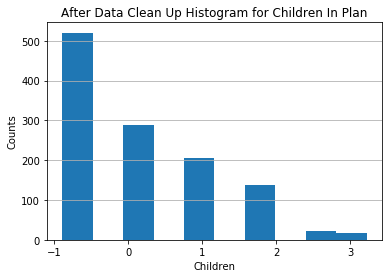

In [267]:
#After data clean up
plt.hist(df_scaled['children'])
plt.title("After Data Clean Up Histogram for Children In Plan")
plt.xlabel("Children")
plt.ylabel("Counts")
plt.grid(axis='y')
plt.show()

#### Histogram for charges

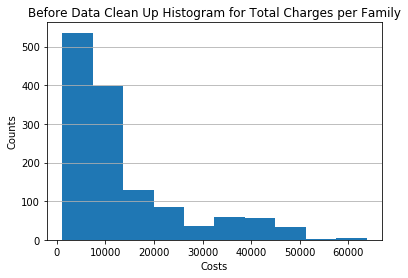

In [268]:
#Before data clean up
plt.hist(df['charges'])
plt.title("Before Data Clean Up Histogram for Total Charges per Family")
plt.xlabel("Costs")
plt.ylabel("Counts")
plt.grid(axis='y')
plt.show()

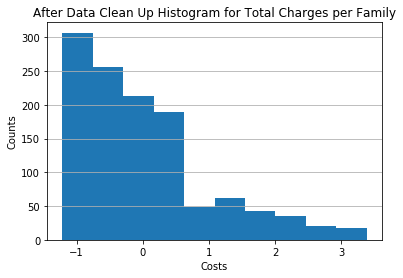

In [269]:
#After data clean up
plt.hist(df_scaled['charges'])
plt.title("After Data Clean Up Histogram for Total Charges per Family")
plt.xlabel("Costs")
plt.ylabel("Counts")
plt.grid(axis='y')
plt.show()

### For cardinality less than 10, we use bar plots


Text(0.5, 0.98, 'Before Data Clean Up Histogram for children')

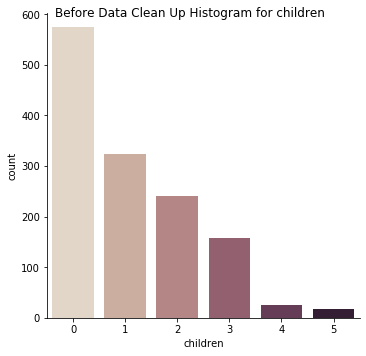

In [270]:
#Before data clean up
snsplt = sns.catplot(x="children",kind="count", palette="ch:.25", data=df)
snsplt.fig.suptitle("Before Data Clean Up Histogram for children")

Text(0.5, 0.98, 'After Data Clean Up Histogram for children')

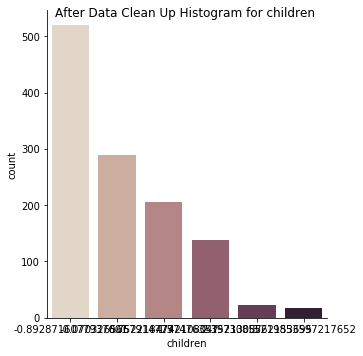

In [271]:
#After data clean up
snsplt2 = sns.catplot(x="children", kind="count", palette="ch:.25", data=df_scaled);
snsplt2.fig.suptitle("After Data Clean Up Histogram for children")

# Data Quality Report - (Categorical Features)

In [272]:
import statistics
data_con = {'Features':  ['sex', 'smoker','region'],
            'Count': ['1338', '1338','1338'],
            '% Missing':  [sum(df['sex'].isnull().values/100), sum(df['smoker'].isnull().values/100),
                           sum(df['region'].isnull().values/100)],
            'Cardinality':  [ df['sex'].unique().size, df['smoker'].unique().size,df['region'].unique().size],
            'Mode':  [statistics.mode(df['sex']), statistics.mode(df['smoker']),statistics.mode(df['region'])],
            'Mode Freq.':  ['676', '1064','364'],
            'Mode %':  [(676/1338)*100, (1064/1338)*100,(364/1338)*100],
            '2nd Mode':  ['female', 'yes','---'],
            '2nd Mode Freq.':  ['662', '274','---'],
            '2nd Mode %':  [(662/1338)*100, (274/1338)*100,'---']
        }
df_data_con = pd.DataFrame (data_con, columns = ['Features','Count','% Missing','Cardinality',
                           'Mode','Mode Freq.','Mode %','2nd Mode','2nd Mode Freq.','2nd Mode %'])
df_data_con

,Features,Count,% Missing,Cardinality,Mode,Mode Freq.,Mode %,2nd Mode,2nd Mode Freq.,2nd Mode %
0,sex,1338,0.0,2,male,676,50.523169,female,662,49.4768
1,smoker,1338,0.0,2,no,1064,79.521674,yes,274,20.4783
2,region,1338,0.0,4,southeast,364,27.204783,---,---,---


In [273]:
print(df['sex'].value_counts())
print(df['smoker'].value_counts())
print('\n******* There is a tie for 2nd mode: ********')
print(df['region'].value_counts())

male      676
female    662
Name: sex, dtype: int64
no     1064
yes     274
Name: smoker, dtype: int64

******* There is a tie for 2nd mode: ********
southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64


### Bar plot for each categorical features - before/after data clean up


#### Bar plot for sex

Text(0.5, 0.98, 'Before Data Clean Up Bar Plot for sex')

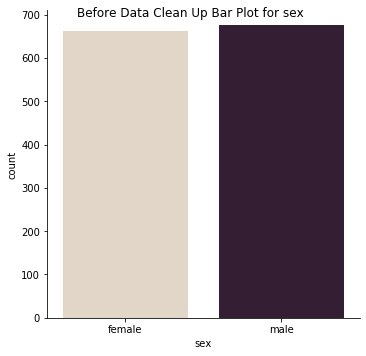

In [274]:
#Before data clean up
snsplt3 = sns.catplot(x="sex", kind="count", palette="ch:.25", data=df);
snsplt3.fig.suptitle("Before Data Clean Up Bar Plot for sex")

Text(0.5, 0.98, 'After Data Clean Up Bar Plot for sex')

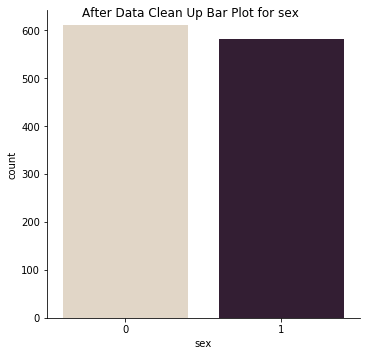

In [275]:
#After data clean up
#0 is female, 1 is male
snsplt4 = sns.catplot(x="sex", kind="count", palette="ch:.25", data=df_scaled);
snsplt4.fig.suptitle("After Data Clean Up Bar Plot for sex")

#### Bar plot for smoker

Text(0.5, 0.98, 'Before Data Clean Up Bar Plot for smoker')

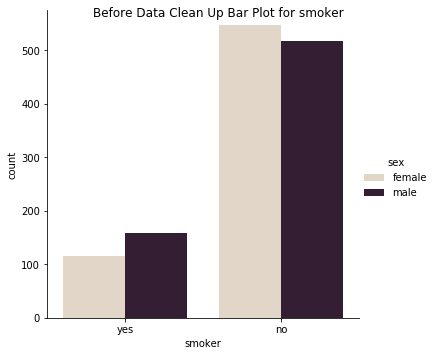

In [276]:
#Before data clean up
snsplt5 = sns.catplot(x="smoker", kind="count", hue='sex', palette="ch:.25", data=df);
snsplt5.fig.suptitle("Before Data Clean Up Bar Plot for smoker")

Text(0.5, 0.98, 'After Data Clean Up Bar Plot for smoker')

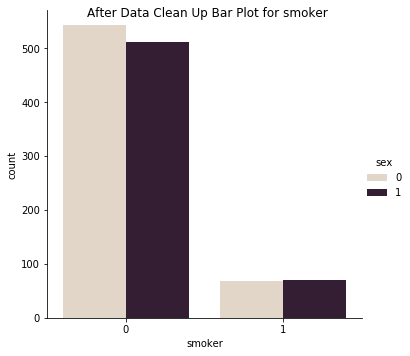

In [277]:
#After data clean up
#Yes is 1, No is 0
#Hue: 0 is female, 1 is male

snsplt6 = sns.catplot(x="smoker", kind="count", hue='sex', palette="ch:.25", data=df_scaled);
snsplt6.fig.suptitle("After Data Clean Up Bar Plot for smoker")

#### Bar plot for region

Text(0.5, 0.98, 'Before Data Clean Up Bar Plot for regions')

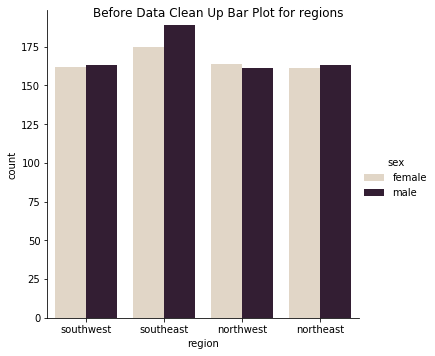

In [278]:
#Before data clean up
snsplt7 = sns.catplot(x="region", kind="count", hue = 'sex', palette="ch:.25", data=df);
snsplt7.fig.suptitle("Before Data Clean Up Bar Plot for regions")

Text(0.5, 0.98, 'After Data Clean Up Bar Plot for regions')

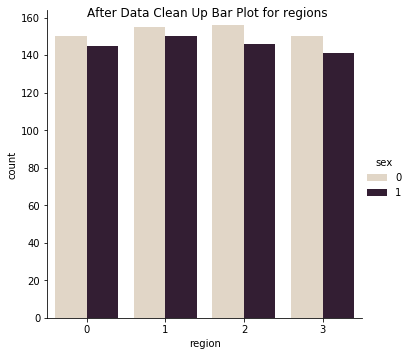

In [279]:
#After data clean up
snsplt8 = sns.catplot(x="region", kind="count", hue = 'sex', palette="ch:.25", data=df_scaled);
snsplt8.fig.suptitle("After Data Clean Up Bar Plot for regions")
#Hue 0 is female, 1 is male
#0=NorthEast, 1=NorthWest, 2=SouthEast, 3=SouthWest

# Data Quality Plan

In [280]:
#data quality plan with potential handling strategies for dataset”
data_plan = {'Features':  ['Children', 'Sex','Region'],
            'Data Quality Issues': ['# of childrens vary', 'Does not change the target variable','Outlier - Southeast'],
            'Potential Handling Strategies':  ['Ignore this feature','Ignore this feature','Ignore this feature']
        }
df_data_plan = pd.DataFrame (data_plan, columns = ['Features','Data Quality Issues','Potential Handling Strategies'])
df_data_plan

,Features,Data Quality Issues,Potential Handling Strategies
0,Children,# of childrens vary,Ignore this feature
1,Sex,Does not change the target variable,Ignore this feature
2,Region,Outlier - Southeast,Ignore this feature


# Visualizing relationships between various health factors

## Charges for female

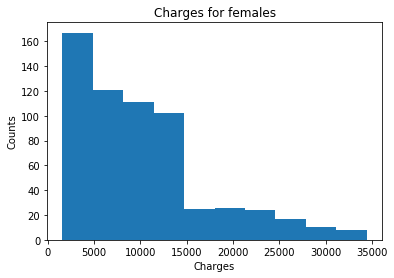

In [281]:
plt.hist(df_copy2[(df_copy2.sex == 0)]["charges"])
plt.title("Charges for females")
plt.xlabel("Charges")
plt.ylabel("Counts")
plt.show()

## Charges for males

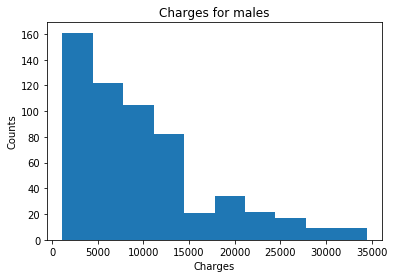

In [282]:
plt.hist(df_copy2[(df_copy2.sex == 1)]["charges"])
plt.title("Charges for males")
plt.xlabel("Charges")
plt.ylabel("Counts")
plt.show()

#### From my analysis, I can see that there is not major difference for male and female charges. Not much information can be extracted from this chart so we will continue to analyze other health factors.

## Age vs Smoking History

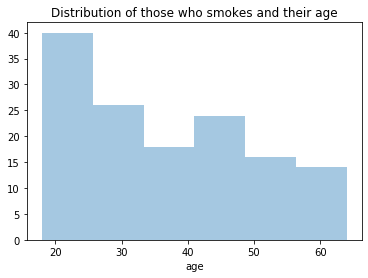

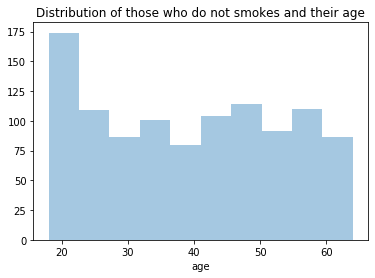

18

In [283]:
sns.distplot(df_copy2[(df_copy2.smoker == 1)]["age"],kde=False)
plt.title("Distribution of those who smokes and their age")
plt.show()

sns.distplot(df_copy2[(df_copy2.smoker == 0)]["age"],kde=False)
plt.title('Distribution of those who do not smokes and their age')
plt.show()
df_copy2['age'].min()

#### In my analysis, I think this chart is very interesting, because I can see number of people who are between 18-30 and in their 40s do not smoke. However, people in their 20s smoke the most.

## Number of Members by Age

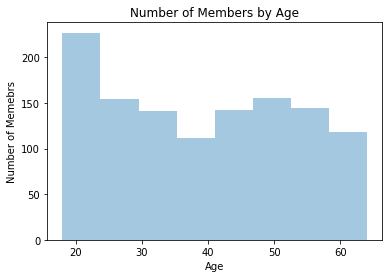

38.981559094719195
39.0


In [284]:
sns.distplot(df_copy2['age'], hist=True, kde=False, bins=int(82/10))
plt.title('Number of Members by Age')
plt.xlabel("Age")
plt.ylabel("Number of Memebrs")
plt.show()

#mean age
print(df_copy2['age'].mean())
#median age
print(df_copy2['age'].median())

#### Here, this tells there are lot of people age 18. Then, it just levels off and the mean age in this dataset is rounded to 39 and middle age is 39 as well.

## BMI per Regions

28.64008474576272
28.870655737704933
32.32506622516557
30.14329896907219


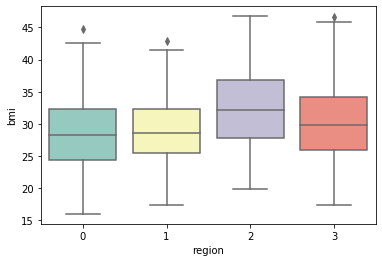

In [285]:
sns.boxplot(x=df_copy2['region'],y=df_copy2['bmi'],data=df_copy2, palette="Set3")
#0=NorthEast, 1=NorthWest, 2=SouthEast, 3=SouthWest

#Region 0 average BMI is 28.6
print(df_copy2[df_copy2['region']==0]['bmi'].mean())
#Region 1 average BMI is 28.9
print(df_copy2[df_copy2['region']==1]['bmi'].mean())
#Region 2 average BMI is 32.3
print(df_copy2[df_copy2['region']==2]['bmi'].mean())
#Region 3 average BMI is 30.1
print(df_copy2[df_copy2['region']==3]['bmi'].mean())

#### In this analysis, I find out that region does not directly impact BMI. However, there is little spike for region 2 (SouthEast) and this can be because of many reasons which we do not have data for to analyze further. The average BMI for NorthEast, NorthWest, and SouthWest are similar to each other. However, SouthEast has the highest average of BMI.

## Number of BMI

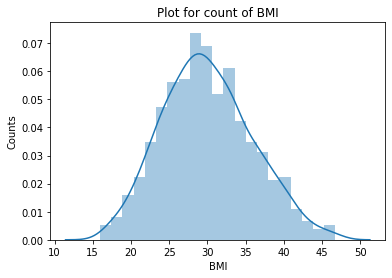

In [286]:
sns.distplot(df_copy2['bmi'])
plt.title("Plot for count of BMI")
plt.xlabel("BMI")
plt.ylabel("Counts")
plt.show()

In [287]:
count2, division2 = np.histogram(df_copy2['bmi'])
#Border for bins
print(division2)

#Counts the number of bmi inside the bin
print(count2)

[15.96  19.039 22.118 25.197 28.276 31.355 34.434 37.513 40.592 43.671
 46.75 ]
[ 25  74 159 229 244 205 127  81  32  17]


#### This is important plot to analyze, because it shows perfectly distributed BMI counts and it tells us alot. 

#### BMI: Body Mass Index, is a measure of body size. It uses person’s weight and height to calculate the BMI. The result we get tells us whether the person is underweight if result is < 18.5, healthy weight if result is 18.5 – 24.9, overweight if result is 25.0 – 29.9, or obesity if result is 30 or higher.

#### From this plot, we can determine that we have 25 people who are underweight; we have 233 people who are healthy; we have 473 people who are overweight; and we have 462 people who are obesity.  

## Charges vs BMI

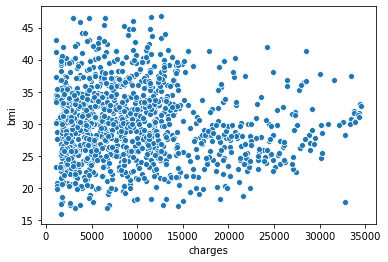

In [288]:
sns.scatterplot(x=df_copy2['charges'],y=df_copy2['bmi'])

In [289]:
#Average charges of dataset
df_copy2['charges'].mean()

9942.269681600168

#### From this scatter plot analysis, I can see there are people who have charges higher than our mean of 9942.26(USD). We will predict and compare if they over overcharged even if they had similar characteristics as people within mean.

## Gender and their BMI across regions

Mean BMI across all regions:
29.99852891869238
Female average BMI in region 2:
32.07557692307691
Male average BMI in region 2:
32.591643835616445


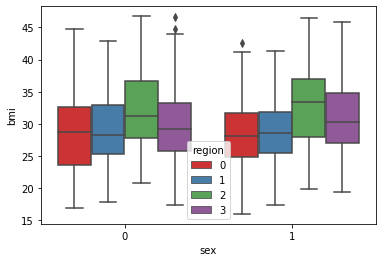

In [290]:
sns.boxplot(x=df_copy2['sex'],y=df_copy2['bmi'],data=df_copy2, palette="Set1",hue="region")
#0=NorthEast, 1=NorthWest, 2=SouthEast, 3=SouthWest

print("Mean BMI across all regions:")
print(df_copy2[df_copy2['region']>=0]['bmi'].mean())

print("Female average BMI in region 2:")
print(df_copy2[df_copy2['region']==2][df_copy2['sex']==0]['bmi'].mean())

print("Male average BMI in region 2:")
print(df_copy2[df_copy2['region']==2][df_copy2['sex']==1]['bmi'].mean())

#### From this analysis, we cannot determine more information other than both gender for SouthEast region have higher BMI then other regions. However, because we do not have more information about this regions and what causes this spikes we cannot truly determine the factors. Across all the regions, we have average BMI of 29.99 or 30 for simplicity. According to the statistics, average BMI for female and male in region 2 are above the average BMI across all regions.

## Gender and their BMI with smoking history

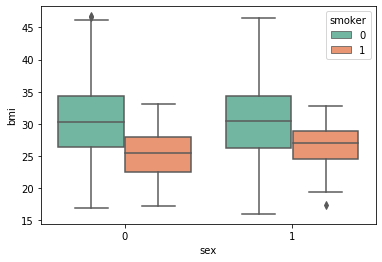

In [291]:
sns.boxplot(x=df_copy2['sex'],y=df_copy2['bmi'],data=df_copy2, palette="Set2",hue="smoker")
#0=NorthEast, 1=NorthWest, 2=SouthEast, 3=SouthWest

In [292]:
print(df_copy2[df_copy2['sex']==0][df_copy2['smoker']==1]['bmi'].mean())
print(df_copy2[df_copy2['sex']==1][df_copy2['smoker']==1]['bmi'].mean())

print(df_copy2[df_copy2['sex']==0][df_copy2['smoker']==0]['bmi'].mean())
print(df_copy2[df_copy2['sex']==1][df_copy2['smoker']==0]['bmi'].mean())
df_copy2.head()


25.140000000000004
26.514928571428573
30.501141804788226
30.587031249999985


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


#### In this analysis, we can see gender really does not impact the BMI. This chart really blew my mind because female who smokes have lower average BMI of 25.15 (overwight) than female who does not some have average BMI of 30.5 (obesity). Male who smokes have lower average BMI of 26.51 (overwight) than male who does not some have average BMI of 30.6 (obesity).

## Smoking history and charges

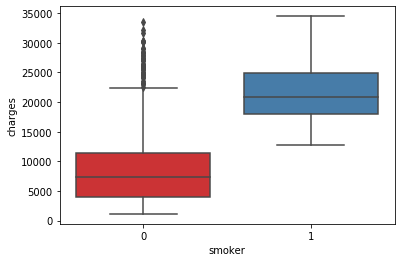

In [293]:
sns.boxplot(x=df_copy2['smoker'],y=df_copy2['charges'],data=df_copy2, palette="Set1")
#0=NorthEast, 1=NorthWest, 2=SouthEast, 3=SouthWest

#### According to the box plot, we clearly see that those who smokes tend to have higher charges. However, those who do not smoke still charged higher than someone who does not smoke. This causes problem for medical payers and insurance providers are profitting because of this issue.

## Smoking history and BMI across regions

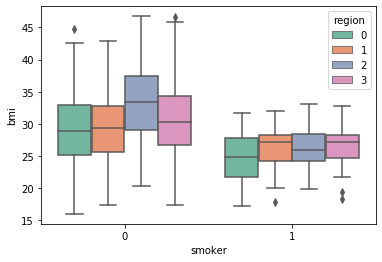

In [294]:
sns.boxplot(x=df_copy2['smoker'],y=df_copy2['bmi'],data=df_copy2, palette="Set2",hue='region')
#0=NorthEast, 1=NorthWest, 2=SouthEast, 3=SouthWest

#### In this analysis, we can see those who smokes for across the regions seems to have variable BMI levels. This means that its not constant, but its changing widely throughout. On the other hand, for those who do not smoke have cimilar BMI levels except for SouthEast region.

## Smoking history and charges across regions

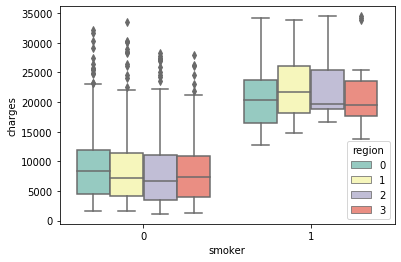

In [295]:
sns.boxplot(x=df_copy2['smoker'],y=df_copy2['charges'],data=df_copy2, palette="Set3",hue='region')
#0=NorthEast, 1=NorthWest, 2=SouthEast, 3=SouthWest

#### In this analysis, for non smokers there are people who are beyond the whiskers who are getting charged by the insurance company heavily. On other side, we have smokers and looks like they are charged more and have smililar cost for all regions.

## Charges and age for those who smokes and those who do not smokes

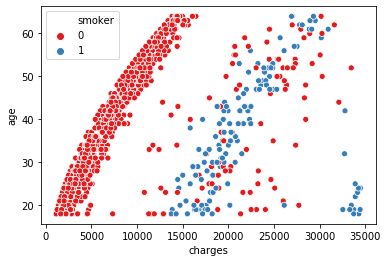

In [296]:
sns.scatterplot(x=df_copy2['charges'],y=df_copy2['age'],data=df_copy2, palette="Set1",hue='smoker')

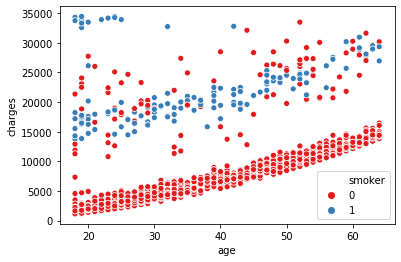

In [297]:
sns.scatterplot(x=df_copy2['age'],y=df_copy2['charges'],data=df_copy2, palette="Set1",hue='smoker')

#### From my analysis, I can see that those who smokes definetly are paying higher than majority of the non-smokers. Also, there is very nice trend for majority of non-smokers who are paying less than 15000(USD) in medical charges. We can also notice non-smokers are paying too much and we will find out what they should be paying based on similar non-smokers from our Machine Learning Models. Yet, there are few smokers who are paying above 30000(USD) and this group is apart from smokers trend.

## Children vs charges

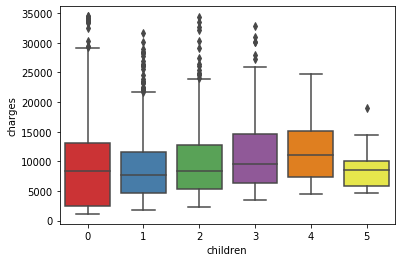

In [298]:
sns.boxplot(x=df_copy2['children'],y=df_copy2['charges'],data=df_copy2, palette="Set1")

#### From my analysis, I can see that more the children, the higher the medical charges. However, the majority of the members does not have children and they still pay higher. On the other hand, I see the trend is increasing as children increases.

## Region vs charges

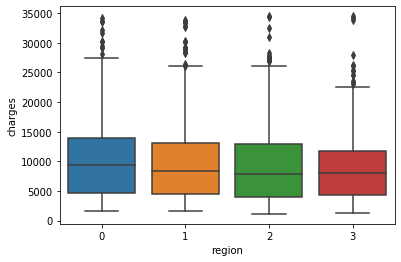

In [299]:
sns.boxplot(x=df_copy2['region'],y=df_copy2['charges'],data=df_copy2)
#0=NorthEast, 1=NorthWest, 2=SouthEast, 3=SouthWest

#### From my analysis, I can see that regions does not impact the charges. We can see the median charges paid is relatively the same for all regions. However, we can notice just slight difference for region 0 (NorthEast) which has quartile 3 higher and region 3 (SouthWest) which has quartile 3 lower of all other regions.

## Lets visualize using pairplot to get bigger picture of trends

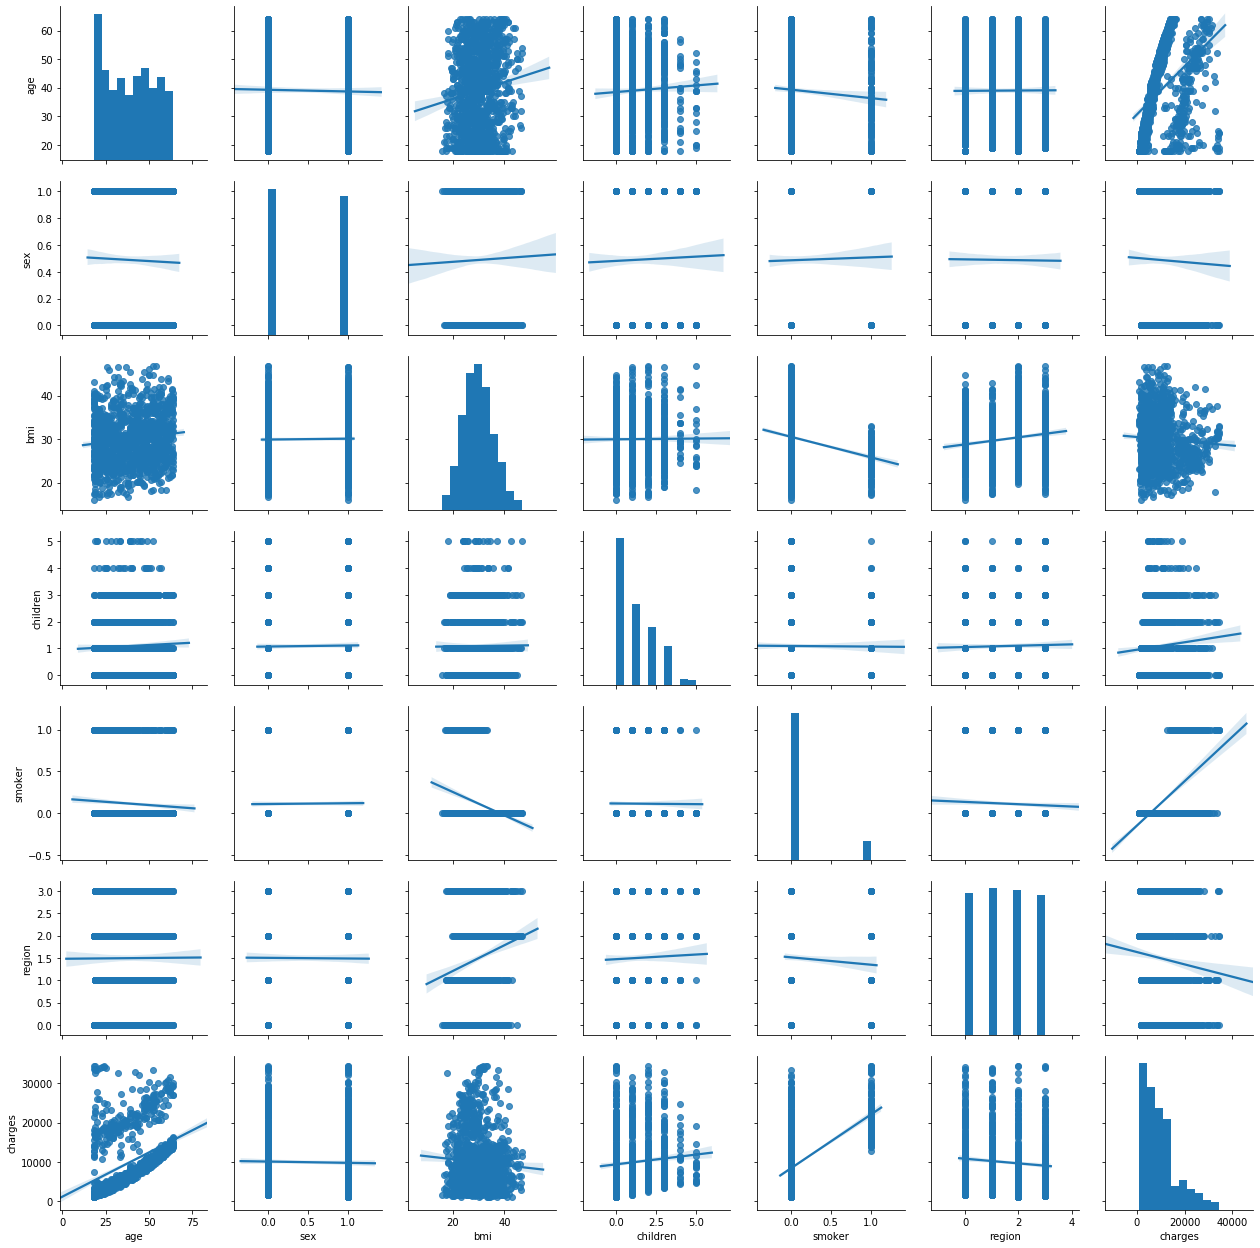

In [300]:
sns.pairplot(df_copy2,kind='reg')

### From the above pairplot, we can analyze that we have many features that shows trends. 
    1) We will focus on charges (target variable)
        a) We can make hypothesis that as age increases, the charges also increases.
        b) We can make hypothesis that as bmi increases, the charges are decreasing. We see that bmi of around 30
           shows charges are higher than those who have lower. We will have to test in our model.
        c) We can make hypothesis that those who have more children, the higher the medical cost they are paying.
        d) We can make hypothesis that those who smokes, the higher the charges.
        e) From my hypothesis, the features we will be using are: Age, BMI, Children, and Smoker.
           Our target variable to predict is charges based on the these features.

# Analytics Base Table - Exporting our DataFrame to a CSV File for ML Modeling

In [301]:
df_copy2.to_csv(r'jivani_pp.csv', index = False, header=True)